# Titanic Survival Prediction

In [1]:
# import librarires
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

## Data Collection

Data is the fuel that powers machine learning algorithms. In this stage, we gather relevant data that will help us train and test our model.

In [2]:
train_tt = pd.read_csv('/kaggle/input/titanic-dataset/train.csv')
test_tt = pd.read_csv('/kaggle/input/titanic-dataset/test.csv')
combine = [train_tt, test_tt]

## Data Preparation:

It is necessary to clean and prepare raw data before using it for training as it is frequently disorganised. At this point, you will need to deal with missing data, eliminate outliers, and encode categorical variables in a way that makes them compatible with machine learning techniques.

In [3]:
print(train_tt.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


**Which features are categorical?**

These values classify the samples into sets of similar samples. Within categorical features are the values nominal, ordinal, ratio, or interval based? Among other things this helps us select the appropriate plots for visualization.

- Categorical: Survived, Sex, and Embarked. Ordinal: Pclass.

**Which features are numerical?**

Which features are numerical? These values change from sample to sample. Within numerical features are the values discrete, continuous, or timeseries based? Among other things this helps us select the appropriate plots for visualization.

- Continous: Age, Fare. Discrete: SibSp, Parch.

In [4]:
# preview the data
train_tt.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_tt.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
train_tt.info()
print('_'*40)
test_tt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

**How are the numerical feature values distributed throughout the samples?**

This aids in determining how representative the training dataset is of the real issue domain, among other preliminary findings.

- There are 891 samples in all, which is 40% of the 2,224 people that were actually on board the Titanic.
- The category characteristic "survived" has two possible values: 0 and 1.
- About 38% of the samples survived, which is comparable to the real survival rate of 32%.
- The majority of travellers (more than 75%) did not bring their families or kids.
- About 30% of the travellers were travelling with their spouses or siblings.
- There was a wide range in fares, with very few people (<1%) having to spend as much as $512.
There are very few senior travellers (<1%) in the 65–80 age group.

In [7]:
train_tt.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**How are categorical characteristics distributed?**

- The count of unique names in the sample is 891.
65% of the available values for the sex variable are male (top=male, freq=577/count=891).
- Cabin values vary widely among samples in several dimensions. Alternatively, a cabin was shared by many travellers.
- Three values are allowed for embarked. Most travellers utilise port S (top=S).
- The proportion of duplicate values in the ticket feature is significant (22%) (unique=681).

In [8]:
train_tt.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


## Examine by rotating the features

By pivoting features against each other, we can rapidly analyse our feature correlations and validate some of our findings and hypotheses. Right now, we are only able to accomplish this for features that have no empty values. Additionally, it seems appropriate to limit this to attributes of the discrete (SibSp, Parch), ordinal (Pclass), or categorical (Sex) types.

- **Pclass** A noteworthy association (>0.5) has been seen between Pclass=1 and Survived (classifying #3). We choose to incorporate this function into our model.
- **Sex** We validate the finding from the issue description phase that the survival rate for Sex=female was a very high 74% (classifying #1).
- **Parch and SibSp** For some numbers, there is no link between these properties. To extract a feature or a collection of features from these individual features (creating #1).

In [9]:
train_tt[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [10]:
train_tt[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [11]:
train_tt[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [12]:
train_tt[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


## Examine through data visualisation

We may now use data analysis visualisations to continue verifying some of our hypotheses.

### Connecting numerical attributes

First, let's examine the relationships that exist between numerical characteristics and our solution objective (survived).

An analysis of continuous numerical variables, such as age, where banding or ranges may assist uncover meaningful patterns, might benefit from the usage of a histogram graphic. The distribution of samples can be shown on the histogram by employing evenly spaced bands or automatically generated bins. This assists us in responding to inquiries about certain bands, such as "Did infants have a better survival rate?"

Keep in mind that the number of samples or passengers is represented by the x-axis in histogram visualisations.

**Observations.**

- The survival rate was high for infants (age <= 4).
- The oldest passenger (80 years old) survived.
- Many individuals aged 15 to 25 did not make it out alive.
- Most travellers are between the ages of 15 and 35.

**Actions.**

Our assumptions as judgements for the next steps of the process are supported by this straightforward analysis.

- When training our model, we ought to take Age (our assumption for categorising #2) into account.
- Finish the Age feature (completing #1) for null values.
- Age groupings ought to be banded (generating #3).

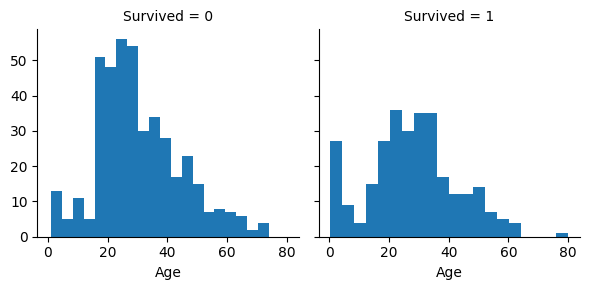

In [13]:
g = sns.FacetGrid(train_tt, col='Survived')
g.map(plt.hist, 'Age', bins=20)

### Linking ordinal and numerical properties

A single plot can be used to aggregate several characteristics in order to find correlations. Both category and numerical characteristics with numerical values can be used for this.

**Observations.**

- The majority of the passengers in Pclass=3 did not survive, nevertheless.Verifies our second classification assumption. 
- The majority of the infant travellers in Pclass=2 and Pclass=3 survived. This clarifies our second categorising assumption.
- The majority of Pclass=1 passengers survived. Verifies our third classification assumption.
- The age distribution of passengers in Pclass fluctuates.

**Actions.**

Take Pclass into account while training models.

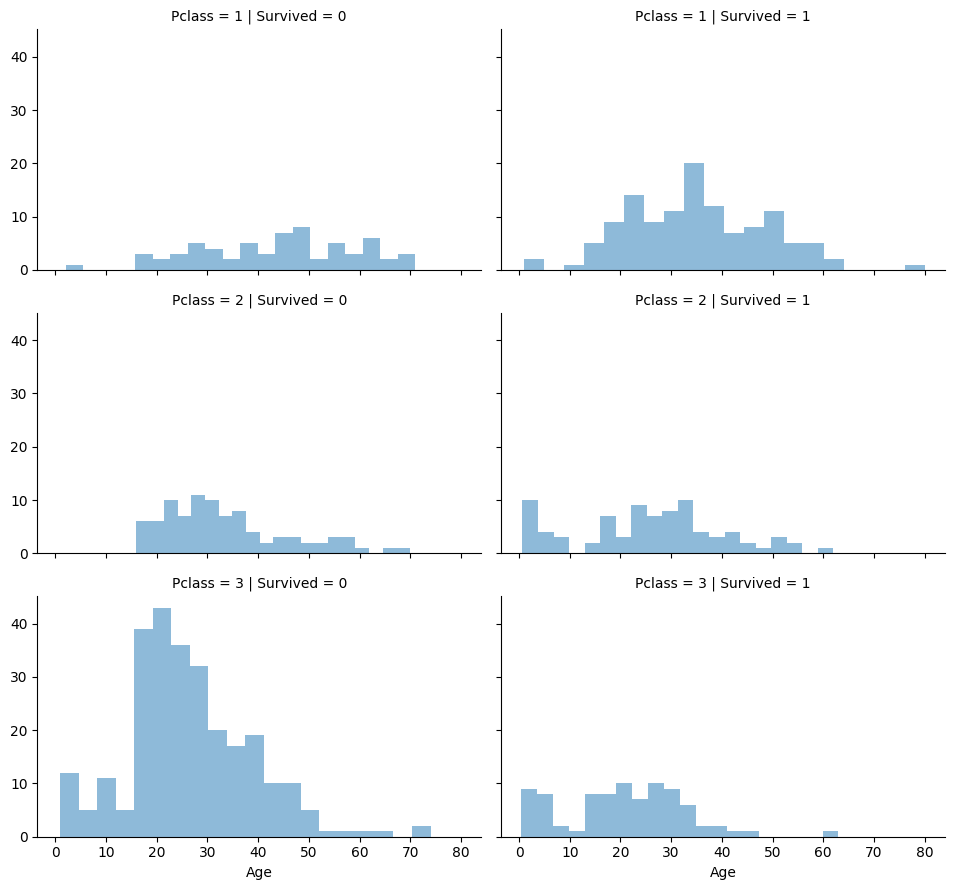

In [14]:
# grid = sns.FacetGrid(train_tt, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train_tt, col='Survived', row='Pclass', aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

### Linking traits that are categorical

We may now tie our solution aim to category characteristics.

**Observations.**

- Passengers who were female fared far better than those who were male. Verifies categorization (#1).
- The exception was Embarked=C, when the survival rate was greater for men. There may not always be a direct association between Embarked and Survived; instead, there may be a correlation between Pclass and Embarked and then Pclass and Survived.
- For the C and Q ports, males showed a higher survival rate in Pclass=3 than in Pclass=2. Finishing (#2).
- Male passengers with Pclass=3 have different survival rates at different ports of embarkation. Connecting (#1).

**Actions.**

- Enhance model training with the Sex function.
- Finish the model training process and add the Embarked feature.

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:717: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


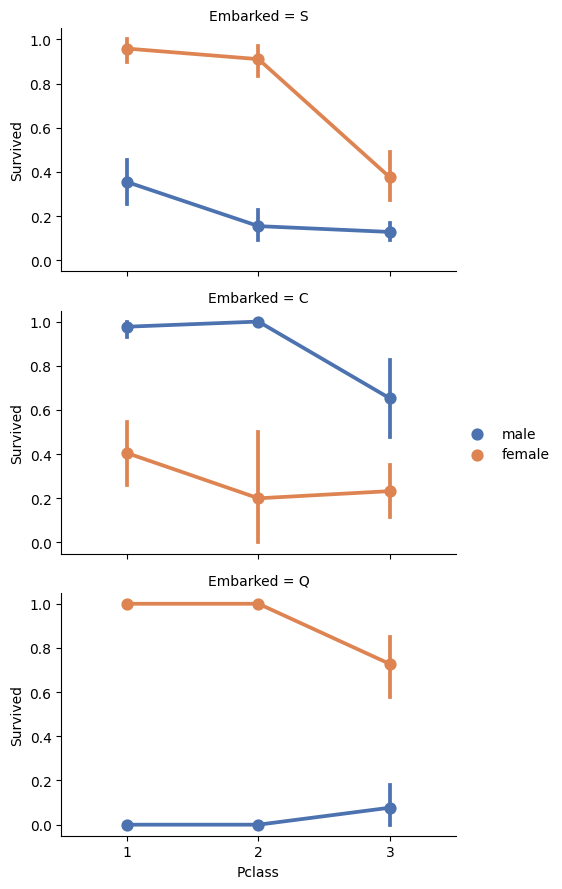

In [15]:
# grid = sns.FacetGrid(train_tt, col='Embarked')
grid = sns.FacetGrid(train_tt, row='Embarked', aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

### Linking numerical and category attributes

Additionally, we could want to link both numeric and category variables (with non-numeric values). We can think about establishing a correlation between Survived (categorical numeric) and Embarked (categorical non-numeric), Sex (categorical non-numeric), and Fare (Numeric continuous).

**Observations.**

Passengers who paid more fares fared better. Verifies our hypothesis for the creation of (#4) fare ranges.
- Survival rates are correlated with the port of embarkation. Verifies completion (#2) and correlation (#1).

**Actions.**

Think of grouping the Fare feature.

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/opt/conda/lib/python3.10/site-pack

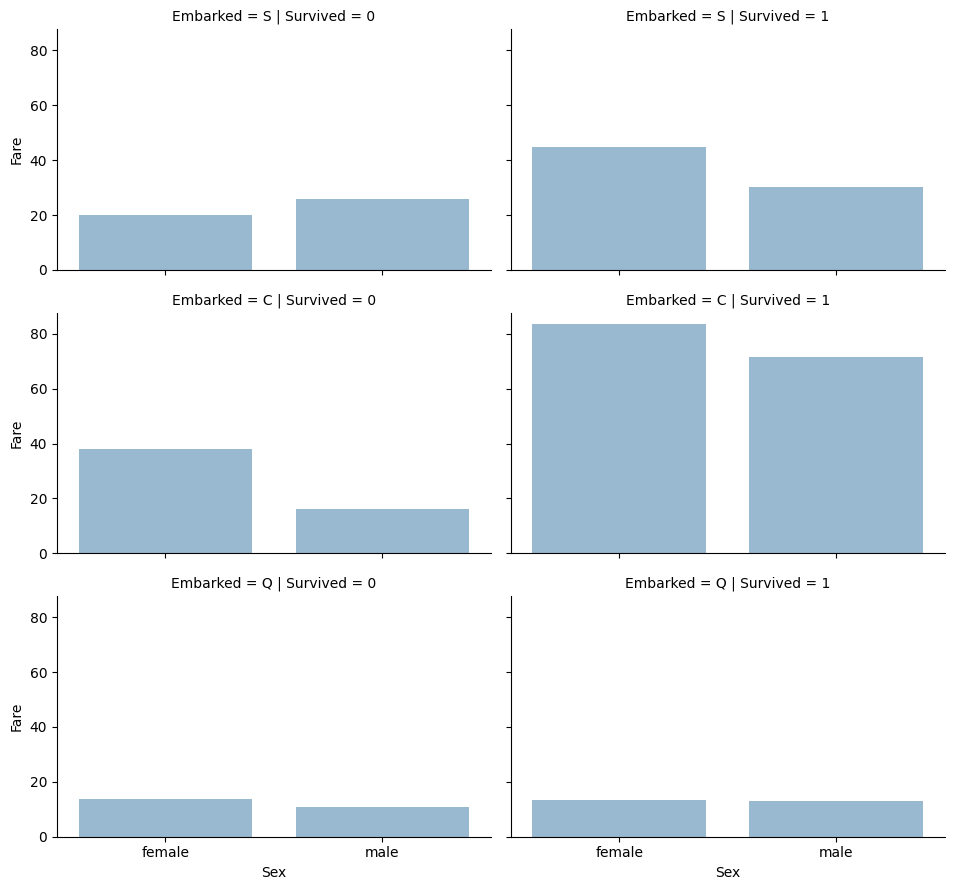

In [16]:
# grid = sns.FacetGrid(train_tt, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(train_tt, row='Embarked', col='Survived', aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

In [17]:
print("Before", train_tt.shape, test_tt.shape, combine[0].shape, combine[1].shape)

train_tt = train_tt.drop(['Ticket', 'Cabin'], axis=1)
test_tt = test_tt.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_tt, test_tt]

"After", train_tt.shape, test_tt.shape, combine[0].shape, combine[1].shape

Before (891, 12) (418, 11) (891, 12) (418, 11)


('After', (891, 10), (418, 9), (891, 10), (418, 9))

In [18]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_tt['Title'], train_tt['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [19]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_tt[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [20]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_tt.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [21]:
train_tt = train_tt.drop(['Name', 'PassengerId'], axis=1)
test_tt = test_tt.drop(['Name'], axis=1)
combine = [train_tt, test_tt]
train_tt.shape, test_tt.shape

((891, 9), (418, 9))

In [22]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_tt.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


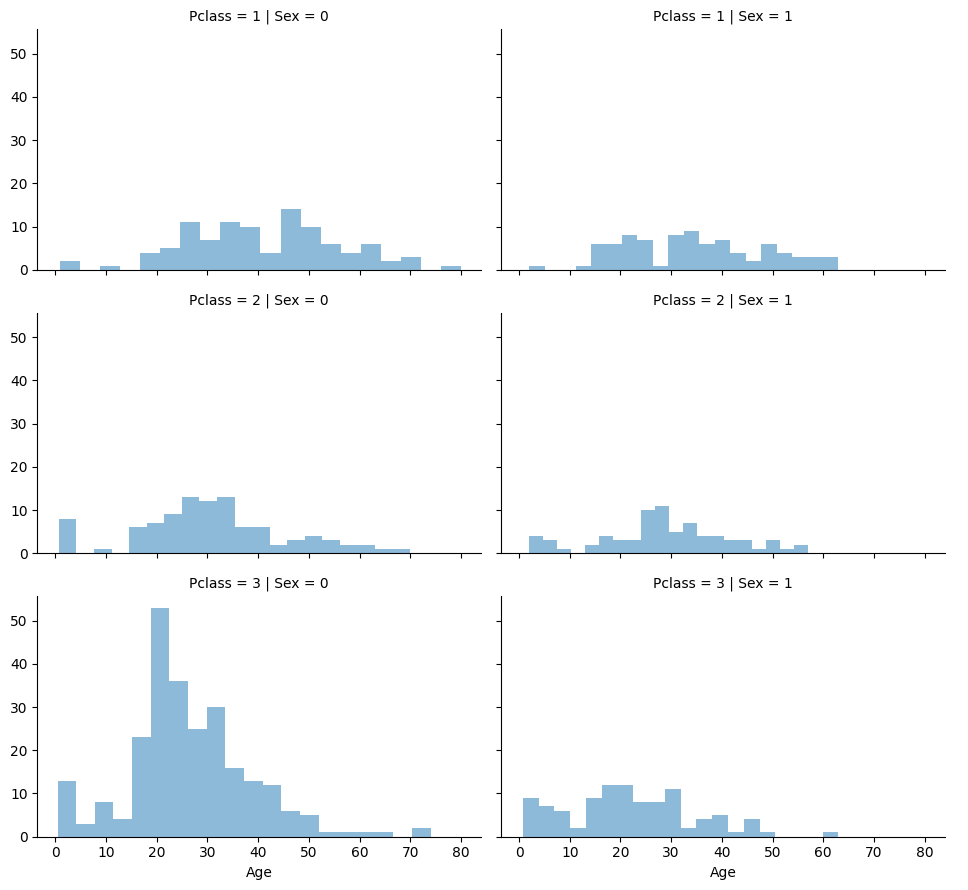

In [23]:
grid = sns.FacetGrid(train_tt, row='Pclass', col='Sex', aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [24]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [25]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_tt = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_tt.mean()
            # age_std = guess_tt.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_tt.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_tt.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


In [26]:
train_tt['AgeBand'] = pd.cut(train_tt['Age'], 5)
train_tt[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

/tmp/ipykernel_119/1573746316.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_tt[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)


,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [27]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_tt.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [28]:
train_tt = train_tt.drop(['AgeBand'], axis=1)
combine = [train_tt, test_tt]
train_tt.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


In [29]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_tt[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [30]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_tt[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [31]:
train_tt = train_tt.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_tt = test_tt.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_tt, test_tt]

train_tt.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


In [32]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_tt.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


In [33]:
freq_port = train_tt.Embarked.dropna().mode()[0]
freq_port

'S'

In [34]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_tt[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [35]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_tt.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


In [36]:
test_tt['Fare'].fillna(test_tt['Fare'].dropna().median(), inplace=True)
test_tt.head()

/tmp/ipykernel_119/1029956770.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_tt['Fare'].fillna(test_tt['Fare'].dropna().median(), inplace=True)


,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


In [37]:
train_tt['FareBand'] = pd.qcut(train_tt['Fare'], 4)
train_tt[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

/tmp/ipykernel_119/4246864353.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_tt[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)


,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [38]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_tt = train_tt.drop(['FareBand'], axis=1)
combine = [train_tt, test_tt]
    
train_tt.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


In [39]:
test_tt.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3
5,897,3,0,0,1,0,1,1,0
6,898,3,1,1,0,2,2,1,3
7,899,2,0,1,2,0,1,0,2
8,900,3,1,1,0,1,3,1,3
9,901,3,0,1,2,0,1,0,3


## Model, forecast, and address

We can now train a model to anticipate the needed solution. More than sixty predictive modelling methods are available for selection. To reduce the number of models we may analyse to a manageable number, we must comprehend the nature of the problem and the requirements for the solution. We are dealing with a classification and regression issue. Our goal is to determine how output—whether it survived or not—relates to other characteristics or factors, such as gender, age, port, etc. As we train our model using a particular dataset, we are also engaging in a type of machine learning known as supervised learning. We can select only a few models using these two criteria: Supervised Learning + Classification and Regression. Among them are:

- Logistic Regression
- KNN or k-Nearest Neighbors
- Support Vector Machines
- Naive Bayes classifier
- Decision Tree
- Random Forrest
- Perceptron
- Artificial neural network
- RVM or Relevance Vector Machine

In [40]:
X_train = train_tt.drop("Survived", axis=1)
Y_train = train_tt["Survived"]
X_test  = test_tt.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

Logistic Regression is an effective model to run early in the workflow. In logistic regression, the connection between a categorical dependent variable (feature) and one or more independent variables (features) is measured by utilising the cumulative logistic distribution as the logistic function to estimate probabilities.

In [41]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

80.36

In [42]:
coeff_tt = pd.DataFrame(train_tt.columns.delete(0))
coeff_tt.columns = ['Feature']
coeff_tt["Correlation"] = pd.Series(logreg.coef_[0])

coeff_tt.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.201619
5,Title,0.397888
2,Age,0.287011
4,Embarked,0.261473
6,IsAlone,0.126553
3,Fare,-0.086655
7,Age*Class,-0.311069
0,Pclass,-0.750700


Support Vector Machines, supervised learning models with corresponding learning algorithms that examine data utilised for regression analysis and classification, are the next modelling technique we employ. An SVM training technique creates a model that allocates fresh test samples to one or the other category given a set of training samples that are all tagged as belonging to one of **two categories**. This makes the model a non-probabilistic binary linear classifier.

In [43]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

78.23

The k-Nearest Neighbours algorithm, or k-NN for short, is a non-parametric technique used in pattern recognition for regression and classification. A sample is allocated to the class most frequent among its k nearest neighbours (k is a positive integer, usually small) based on a majority vote of its neighbours. The item is just put into the class of that one nearest neighbour if k = 1.

In [44]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.74

Naive Bayes classifiers in machine learning are a family of straightforward probabilistic classifiers that use the Bayes theorem and strong (naive) independence assumptions between the features. The number of parameters needed for naive Bayes classifiers is linear in the number of variables (features) in a learning task, making them extremely scalable.

In [45]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

72.28

The perceptron is a supervised learning approach for binary classifiers (functions that determine whether an input vector of numbers belongs to a given class or not). It's a kind of linear classifier, meaning that the classification method bases its predictions on a linear predictor function that combines the feature vector with a set of weights. Because the method processes each element in the training set one at a time, it enables online learning.

In [46]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

78.34

Linear SVC (Support Vector Classifier) is a classifier from the Support Vector Machine (SVM) family. It is designed to discover the optimal hyperplane to distinguish various classes in datasets that are linearly separable. Because of its scalability and efficiency, linear SVC is frequently used to situations involving massive amounts of data or high-dimensional feature spaces.

In [47]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


79.12

For big datasets and deep learning models in particular, the optimisation technique of choice in machine learning is stochastic gradient descent, or SGD. SGD modifies model parameters one data point at a time as opposed to classical Gradient Descent, which processes the full dataset all at once. It is hence appropriate for online learning and computationally efficient. SGD is frequently utilised in a variety of machine learning applications as it converges on a solution despite its noisy updates.

In [48]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

76.21

This approach links features (tree branches) to conclusions about the target value (tree leaves) using a decision tree as a prediction model. Classification trees are tree models in which the target variable can have only a limited number of values. The leaves in these tree structures stand for class labels, and the branches for feature conjunctions that lead to those class labels. Regression trees are decision trees in which the goal variable is capable of taking continuous values, usually real numbers.

In [49]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

86.76

One the most preferred ones is Random Forests. Random forests, also known as random decision forests, are an ensemble learning technique for classification, regression, and other tasks. They work by building a large number of decision trees (n_estimators=100) during the training phase and producing a class that represents the mean prediction (in regression) or the mode of the classes (in classification).

In [50]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

86.76

### Model evaluation

Now that we have ranked all of the models, we may select the greatest fit for our situation. Despite the fact that Random Forest and Decision Tree have identical scores, we choose with Random Forest as it adjusts for decision trees' tendency to overfit to their training set.

In [51]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,86.76
8,Decision Tree,86.76
1,KNN,84.74
2,Logistic Regression,80.36
7,Linear SVC,79.12
5,Perceptron,78.34
0,Support Vector Machines,78.23
6,Stochastic Gradient Decent,76.21
4,Naive Bayes,72.28


In [52]:
submission = pd.DataFrame({
        "PassengerId": test_tt["PassengerId"],
        "Survived": Y_pred
    })

In [53]:
#submission.to_csv('submission.csv', index=False)